In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL.Image import Image
import shutil

# count the images per painter

In [2]:
dir_path = os.path.join(os.getcwd(), 'schilderijen')
for root, dirs, files in os.walk(dir_path):
    if root != dir_path:
        print(f"There are {len(files)} paintings from {os.path.basename(root)}")

# Usage:
# count_files_in_subdirs('path_to_your_directory')

There are 330 paintings from Mondriaan
There are 1529 paintings from Picasso
There are 83 paintings from Rembrandt
There are 685 paintings from Rubens


In [3]:
def load_images_from_folder(folder):
    images_dims = []
    for subdir, dirs, files in os.walk(folder):
        for file in files:
            img = cv2.imread(os.path.join(subdir, file))
            if img is not None:
                height, width, depth = img.shape
                images_dims.append([height, width])
    return np.array(images_dims)

src_dir = 'schilderijen'
images_np_array = load_images_from_folder(src_dir)

# Statistics of the width of the images

In [4]:
heights = images_np_array[:, 0]
print("Min height: ", np.min(heights))
print("Max height: ", np.max(heights))
print("Mean height: ", np.mean(heights))
print("Median height: ", np.median(heights))
print("25th percentile of height: ", np.percentile(heights, 25))
print("75th percentile of height: ", np.percentile(heights, 75))

Min height:  127
Max height:  1400
Mean height:  585.9904761904762
Median height:  550.0
25th percentile of height:  421.0
75th percentile of height:  732.0


# statistics of the height of the images

In [5]:
widths = images_np_array[:, 1]

# Compute and print statistics
print("Min width: ", np.min(widths))
print("Max width: ", np.max(widths))
print("Mean width: ", np.mean(widths))
print("Median width: ", np.median(widths))
print("25th percentile of width: ", np.percentile(widths, 25))
print("75th percentile of width: ", np.percentile(widths, 75))

Min width:  550
Max width:  550
Mean width:  550.0
Median width:  550.0
25th percentile of width:  550.0
75th percentile of width:  550.0


# and in a nice graph:

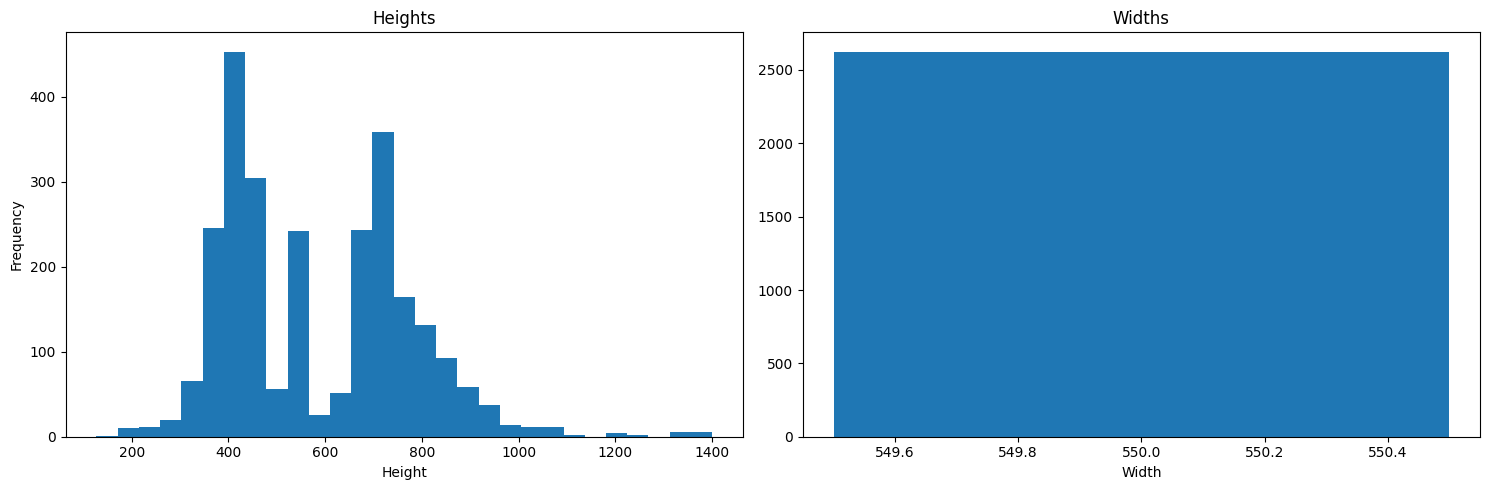

In [6]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.hist(heights, bins='auto')
plt.title('Heights')
plt.xlabel('Height')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(widths, bins='auto')
plt.title('Widths')
plt.xlabel('Width')

plt.tight_layout()
plt.show()

These graphs show the frequency in which the widths and heights appear in de dataset.

# creating the dataset
I chose for a mix of Under sampled, oversampled and Imbalanced.
For the interpolation I would use Nearest-neigbor because it is best suited for categorization

In [7]:
def crate_map(path):
    if not os.path.exists(path):
        os.makedirs(path)
        
painters = ['picasso', 'mondriaan', 'rembrandt', 'rubens']
situations = ['test', 'train', 'validation']

cwd = os.getcwd()
dataset_path = os.path.join(cwd, 'dataset')

for situation in situations:
    for painter in painters:
        folder_path = os.path.join(dataset_path, situation, painter)
        crate_map(folder_path)

In [8]:
def resize_image(input_image_path, output_image_path, size=550):
    original_image = cv2.imread(input_image_path)
    if original_image is None:
        print('Could not load image')
        return
    width, height = original_image.shape[:2]
    
    if width > height:
        new_width = size
        new_height = round(new_width * 3/4)
    else:
        new_height = size
        new_width = round(new_height * 3/4)
        
    resized_img = cv2.resize(original_image, (new_width, new_height))

    if width > height:
        blank_image_width = 550
        blank_image_height = 412
    else:
        blank_image_width = 412
        blank_image_height = 550

    blank_image = np.ones([blank_image_height, blank_image_width, 3], dtype=np.uint8) * 255

    y_offset = (blank_image_height - new_height) // 2
    x_offset = (blank_image_width - new_width) // 2

    blank_image[y_offset:y_offset+new_height, x_offset:x_offset+new_width] = resized_img
    
    # check if output_image_path has a valid extension
    _, ext = os.path.splitext(output_image_path)

    assert ext in ['.jpg', '.png', '.bmp', '.tiff', '.JPG', '.jpeg'], "Invalid file extension provided :" + ext
    cv2.imwrite(output_image_path, blank_image)

def add_to_map(image, painter: str, status: str):
    if status == 'train':
        folder_path = os.path.join(dataset_path, 'train', painter.lower(), os.path.basename(image))
    elif status == 'test':
        folder_path = os.path.join(dataset_path, 'test', painter.lower(), os.path.basename(image))
    elif status == 'validation':
        folder_path = os.path.join(dataset_path, 'validation', painter.lower(), os.path.basename(image))
    else:
        print("Invalid status")
        return
    image_path = os.path.join(os.getcwd(), painter, image)
    resize_image(image_path, folder_path)

def create_dataset(painter):
    painter_paht = os.path.join(os.getcwd(), 'schilderijen', painter)
    originals = os.listdir(painter_paht)
    
    for i in range(0, 60):
        add_to_map(os.path.join(painter_paht, originals[i]), painter, 'train')
        
    for i in range(61, 81):
        add_to_map(os.path.join(painter_paht, originals[i]), painter, 'test')
        
    for i in range(81, len(originals)):
        add_to_map(os.path.join(painter_paht, originals[i]), painter, 'validation')

originals = os.listdir('schilderijen')

for painter in painters:
    create_dataset(painter)

Could not load image
Could not load image
